In [123]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import os
dir='Plots'
if not os.path.exists(dir):
    os.makedirs(dir)

# Solver Class

In [130]:
class solver():

  def __init__(self,
              scheme_acronym, 
              fluid_velocity = 2,
              fluid_density = 0.5,
              Gamma = 0.5,
              domain_L = 5,
              inlet_bc = 100,
              outlet_bc = 20,
              grid_spacing = 1e-2
              ):
    
    # Global Attributes
    self.scheme = scheme_acronym
    self.u = fluid_velocity
    self.rho = fluid_density
    self.Gamma = Gamma
    self.L = domain_L
    self.phi_0 = inlet_bc
    self.phi_L = outlet_bc
    self.dx = grid_spacing
    self.global_Pe = self.rho * self.u * self.L / self.Gamma
    self.local_Pe = self.rho * self.u * self.dx / self.Gamma
    self.x = np.array([i*self.dx for i in range(int(self.L/self.dx))])
    self.analytical_phi = np.zeros(int(self.L/self.dx))
    self.phi = np.zeros(int(self.L/self.dx))

    # CDS phi and Coefficients for constant u,dx,Gamma
    self.phi = np.zeros(int(self.L/self.dx))
    self.P = np.zeros(int(self.L/self.dx))
    self.Q = np.zeros(int(self.L/self.dx))
    self.a = 2*self.Gamma / self.dx
    self.b = self.Gamma / self.dx - 0.5 * self.rho * self.u
    self.c = self.Gamma / self.dx + 0.5 * self.rho * self.u

    #Solve for phi
    if self.scheme == "CDS": self.CDS()
    elif self.scheme == "UDS": self.UDS()
    elif self.scheme == "PLDS": self.PLDS()
    self.analytical_soln()

  # Getter methods
  def get_local_Pe(self): return self.local_Pe
  def get_x(self): return self.x
  def get_P(self): return self.P
  def get_Q(self): return self.Q
  def get_numerical_phi(self): return self.phi
  def get_analytical_phi(self): return self.analytical_phi
  
  ## Use Linear Algebraic Equation Solution Algorithm TDMA
  
  def CDS(self):
    # Forward Pass to calculate P and Q
    self.P[0] = 0
    self.Q[0] = self.phi_0 
    self.Q[-1] = self.phi_L
    for i in range(1,len(self.x)-1):
      self.P[i] = self.b / (self.a - self.P[i-1])
      self.Q[i] = self.Q[i-1] / (self.a - self.P[i-1])
      print
    # Backward Pass to calculate phi
    self.phi[-1] = self.Q[-1]
    for i in [y for y in range(1,len(self.x)-1)][::-1]:
      self.phi[i-1] = self.P[i] * self.phi[i+1] + self.Q[i]

  # def UDS():
  
  # def PLDS():

  def analytical_soln(self):
    self.analytical_phi = self.phi_0 + (np.exp(self.global_Pe * self.x/self.L)-1)/(np.exp(self.global_Pe)-1) * (self.phi_L-self.phi_0)

  

In [128]:
def comp_phi_plot(scheme):
  solve = solver(scheme)
  analytical_phi = solve.get_analytical_phi()
  if scheme == "CDS": numerical_phi = solve.get_numerical_phi()
  elif scheme == "UDS": numerical_phi = solve.UDS()
  elif scheme == "PLDS": numerical_phi = solve.PLDS()
  else:
    print("Please enter a valid discrtization scheme acronym")
    return

  plt.plot(solve.get_x(),analytical_phi,label='Analytical Solution')
  plt.plot(solve.get_x(),numerical_phi,label=f'Numerical Solution ({scheme})')

  plt.title(r'Distribution of $\phi$ along the domain')
  plt.xlabel('x')
  plt.ylabel(r'$\phi$')
  plt.legend()
  # plt.show()
  plt.savefig(f'{dir}/CDS',dpi=800)

# Main

Please choose a discretization scheme. Type one of the following options into the command prompt: 
	CDS 
	UDS 
	PLDS
You have chosen to discretize the convection component of the phi convection-diffusion equation with the Central Differencing Scheme


Do you want to terminate the program? 
	yes 
	no


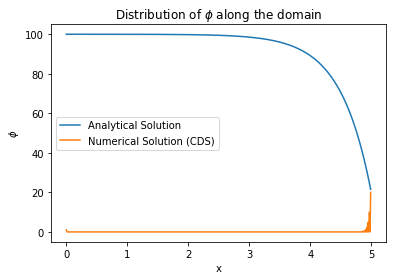

In [131]:
scheme_dict = {'CDS':'Central Differencing Scheme',
               'UDS':'Upwind Differencing Scheme',
               'PLDS':'Power Law Differencing Scheme'}

end_condition = False
while not end_condition:
  #Ask user what type of differencing scheme they would like to try
  while True:
    print("Please choose a discretization scheme. Type one of the following options into the command prompt: \n\tCDS \n\tUDS \n\tPLDS")
    scheme_text = input()
    if scheme_text in ['CDS','UDS','PLDS']: break
    print("Please ensure you have entered the acronym in all caps with no spaces!")
  print(f"You have chosen to discretize the convection component of the phi convection-diffusion equation with the {scheme_dict[scheme_text]}\n\n")

  #Plot the numerical solution against the analytical solution
  comp_phi_plot(scheme_text)

  while True:
    print("Do you want to terminate the program? \n\tyes \n\tno")
    break_cmd = input()
    if break_cmd == 'yes': end_condition = True
    if break_cmd in ['yes','no']: break
    print("Please type your response as presented above.")

# Test Cell

In [117]:
solve = solver('CDS')
solve.get_local_Pe()

0.2